<a href="https://colab.research.google.com/github/fikri7676/tugas-11/blob/main/fikri_Tugas_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks

In [ ]:
ls

In [ ]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [ ]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("tugas")
data = []
labels = []

[INFO] loading images...


In [ ]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [ ]:
print(labels)

['nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB',

In [ ]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


In [ ]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(436, 64, 64, 3)
(146, 64, 64, 3)


In [ ]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(137, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        2336      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 137)               859401    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                

In [ ]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [ ]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 0s 14ms/step - loss: 0.5081 - accuracy: 0.2317 - val_loss: 0.4955 - val_accuracy: 0.2945
Epoch 2/25
14/14 [==============================] - 0s 6ms/step - loss: 0.4761 - accuracy: 0.4174 - val_loss: 0.4640 - val_accuracy: 0.4589
Epoch 3/25
14/14 [==============================] - 0s 6ms/step - loss: 0.4166 - accuracy: 0.5550 - val_loss: 0.3896 - val_accuracy: 0.5959
Epoch 4/25
14/14 [==============================] - 0s 6ms/step - loss: 0.3500 - accuracy: 0.6101 - val_loss: 0.3347 - val_accuracy: 0.6507
Epoch 5/25
14/14 [==============================] - 0s 6ms/step - loss: 0.2850 - accuracy: 0.7087 - val_loss: 0.2997 - val_accuracy: 0.6849
Epoch 6/25
14/14 [==============================] - 0s 6ms/step - loss: 0.2514 - accuracy: 0.7362 - val_loss: 0.3559 - val_accuracy: 0.5411
Epoch 7/25
14/14 [==============================] - 0s 6ms/step - loss: 0.2273 - accuracy: 0.7683 - val_loss: 0.2670 - val_accuracy: 0.7466
Epoch 8/25
14/14 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


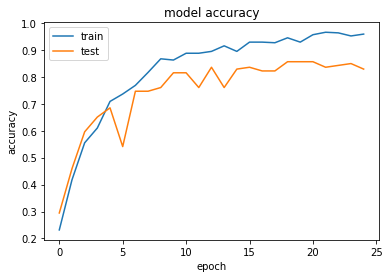

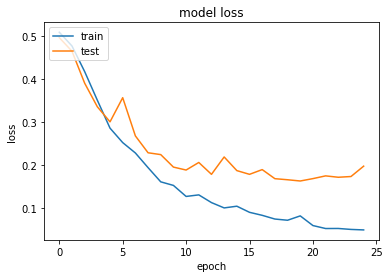

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()